In [1]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 920.0 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=b90ea11e62b176e967cc227345765e61dc5935199b94bed353be6fb83b3f85e2
  Stored in directory: /Users/harshpanghal/Library/Caches/pip/wheels/9c/45/15/6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Importing Dog vs Cat Data from Kaggle

In [7]:
!kaggle competitions download -c dogs-vs-cats

100%|███████████████████████████████████████▉| 812M/812M [04:14<00:00, 3.45MB/s]
100%|████████████████████████████████████████| 812M/812M [04:14<00:00, 3.35MB/s]


In [8]:
ls

DogVsCat Classification.ipynb  kaggle.json
dogs-vs-cats.zip


In [9]:
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The data is estracted!')

The data is estracted!


In [10]:
dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The data is estracted!')

The data is estracted!


In [1]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('train/'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [12]:
file_names = os.listdir('train/')

In [14]:
print(file_names)

['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg', 'cat.2718.jpg', 'cat.10151.jpg', 'cat.3406.jpg', 'dog.1753.jpg', 'cat.4369.jpg', 'cat.7660.jpg', 'dog.5535.jpg', 'cat.8553.jpg', 'cat.9895.jpg', 'cat.1211.jpg', 'dog.3144.jpg', 'dog.775.jpg', 'dog.11102.jpg', 'cat.6218.jpg', 'dog.11664.jpg', 'dog.3622.jpg', 'cat.1577.jpg', 'cat.12020.jpg', 'dog.5253.jpg', 'cat.7106.jpg', 'cat.8235.jpg', 'cat.952.jpg', 'dog.9469.jpg', 'dog.1035.jpg', 'cat.3360.jpg', 'cat.11529.jpg', 'cat.10637.jpg', 'dog.6982.jpg', 'dog.8777.jpg', 'dog.7444.jpg', 'cat.5711.jpg', 'cat.946.jpg', 'cat.3374.jpg', 'dog.1021.jpg', 'dog.6996.jpg', 'cat.10623.jpg', 'dog.8763.jpg', 'cat.5705.jpg', 'dog.7450.jpg', 'dog.12379.jpg', 'dog.11670.jpg', 'dog.4159.jpg', 'cat.1563.jpg', 'dog.3636.jpg', 'cat.12034.jpg', 'dog.2528.jpg', 'cat.7112.jpg', 'dog.5247.jpg', 'cat.8221.jpg', 'dog.10208.jpg', 'dog.5521.jpg', 'cat.7674.jpg', 'cat.8547.jpg', 'cat.9881.jpg', 'dog.761.jpg', 'dog.3150.jpg', 'cat.1205.jpg', 'dog.11116.jpg', 'cat.9659.jpg',

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

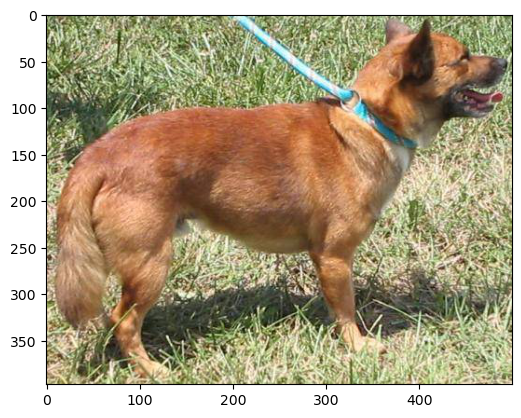

In [3]:
img = mpimg.imread('train/dog.7646.jpg')
imgplt = plt.imshow(img)

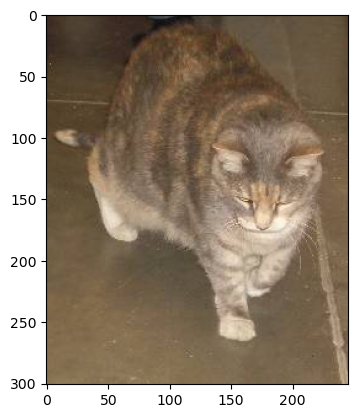

In [4]:
img = mpimg.imread('train/cat.10019.jpg')
imgplt = plt.imshow(img)

# Resizing the images

In [17]:
os.mkdir('image_resized')

In [18]:
original_folder = 'train/'
resized_folder = 'image_resized/'

for i in range(2000):
    
    file_name = os.listdir(original_folder)[i]
    img_path = original_folder+file_name
    
    img = Image.open(img_path)
    img = img.resize((224,224))
    img = img.convert('RGB')
    
    new_img_path = resized_folder+file_name
    img.save(new_img_path)

In [19]:
file_ = os.listdir('image_resized/')
print(file_)
path, dirs, files = next(os.walk('image_resized/'))
file_c = len(files)
print('Number of images: ', file_c)

['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg', 'cat.2718.jpg', 'cat.10151.jpg', 'cat.3406.jpg', 'dog.1753.jpg', 'cat.4369.jpg', 'cat.7660.jpg', 'dog.5535.jpg', 'cat.8553.jpg', 'cat.9895.jpg', 'cat.1211.jpg', 'dog.3144.jpg', 'dog.775.jpg', 'dog.11102.jpg', 'cat.6218.jpg', 'dog.11664.jpg', 'dog.3622.jpg', 'cat.1577.jpg', 'cat.12020.jpg', 'dog.5253.jpg', 'cat.7106.jpg', 'cat.8235.jpg', 'cat.952.jpg', 'dog.9469.jpg', 'dog.1035.jpg', 'cat.3360.jpg', 'cat.11529.jpg', 'cat.10637.jpg', 'dog.6982.jpg', 'dog.8777.jpg', 'dog.7444.jpg', 'cat.5711.jpg', 'cat.946.jpg', 'cat.3374.jpg', 'dog.1021.jpg', 'dog.6996.jpg', 'cat.10623.jpg', 'dog.8763.jpg', 'cat.5705.jpg', 'dog.7450.jpg', 'dog.12379.jpg', 'dog.11670.jpg', 'dog.4159.jpg', 'cat.1563.jpg', 'dog.3636.jpg', 'cat.12034.jpg', 'dog.2528.jpg', 'cat.7112.jpg', 'dog.5247.jpg', 'cat.8221.jpg', 'dog.10208.jpg', 'dog.5521.jpg', 'cat.7674.jpg', 'cat.8547.jpg', 'cat.9881.jpg', 'dog.761.jpg', 'dog.3150.jpg', 'cat.1205.jpg', 'dog.11116.jpg', 'cat.9659.jpg',

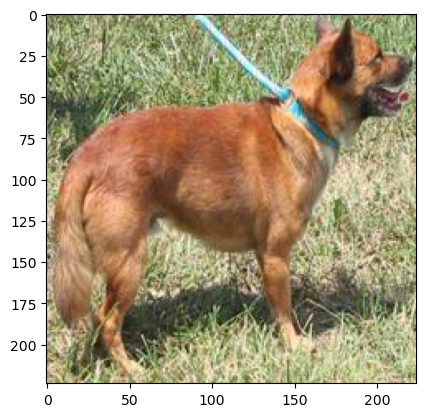

In [5]:
img = mpimg.imread('image_resized/dog.7646.jpg')
imgplt = plt.imshow(img)

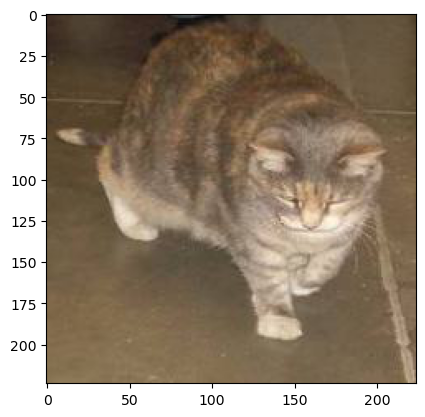

In [6]:
img = mpimg.imread('image_resized/cat.10019.jpg')
imgplt = plt.imshow(img)

Creating labels for resized images

Cats = 0

dogs = 1

In [7]:
labels = []
file_names = os.listdir('image_resized/')

for i in range(2000):
    
    file_name = file_names[i]
    label = file_name[0:3]
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

In [8]:
labels

[1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,


In [9]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 986 1014]


# Converting img to numpy array

In [10]:
import cv2
import glob

In [11]:
image_directory = 'image_resized/'
image_extension = ['png', 'jpg']

In [12]:
files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [13]:
dog_cat_images

array([[[[ 53,  37,  21],
         [ 43,  27,  11],
         [ 50,  34,  18],
         ...,
         [231, 190, 165],
         [232, 192, 167],
         [233, 193, 168]],

        [[ 49,  32,  19],
         [ 39,  22,   9],
         [ 45,  28,  15],
         ...,
         [232, 191, 166],
         [233, 193, 168],
         [234, 194, 169]],

        [[ 45,  28,  15],
         [ 36,  19,   6],
         [ 43,  26,  13],
         ...,
         [231, 190, 165],
         [233, 193, 168],
         [232, 194, 170]],

        ...,

        [[ 58,  32,  26],
         [ 62,  36,  30],
         [ 66,  40,  34],
         ...,
         [ 82,  56,  40],
         [ 82,  56,  40],
         [ 82,  56,  40]],

        [[ 61,  32,  28],
         [ 60,  33,  29],
         [ 62,  36,  30],
         ...,
         [ 82,  56,  40],
         [ 82,  56,  40],
         [ 82,  56,  40]],

        [[ 61,  32,  28],
         [ 56,  29,  25],
         [ 55,  28,  24],
         ...,
         [ 82,  56,  40],
        

In [14]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [15]:
X = dog_cat_images
Y = np.asarray(labels)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=2)

In [17]:
X_train.shape

(1600, 224, 224, 3)

In [18]:
Y_train.shape

(1600,)

In [19]:
X_test.shape

(400, 224, 224, 3)

# Scaling the Data

In [20]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [21]:
print(X_train_scaled)

[[[[0.5372549  0.54117647 0.59607843]
   [0.49411765 0.49803922 0.55294118]
   [0.45882353 0.4745098  0.51764706]
   ...
   [0.46666667 0.5372549  0.56470588]
   [0.45098039 0.51764706 0.55294118]
   [0.44313725 0.50588235 0.55294118]]

  [[0.53333333 0.5372549  0.59215686]
   [0.49803922 0.50196078 0.55686275]
   [0.4627451  0.47843137 0.52156863]
   ...
   [0.4627451  0.53333333 0.56078431]
   [0.45490196 0.52156863 0.55686275]
   [0.45490196 0.51764706 0.56470588]]

  [[0.52941176 0.53333333 0.58823529]
   [0.50196078 0.50588235 0.56078431]
   [0.47058824 0.48627451 0.52941176]
   ...
   [0.4627451  0.53333333 0.56078431]
   [0.4627451  0.52941176 0.56470588]
   [0.46666667 0.53333333 0.56862745]]

  ...

  [[0.61176471 0.6627451  0.65490196]
   [0.61568627 0.66666667 0.65882353]
   [0.61960784 0.67058824 0.6627451 ]
   ...
   [0.61176471 0.6745098  0.67058824]
   [0.61176471 0.6745098  0.67058824]
   [0.61568627 0.67843137 0.6745098 ]]

  [[0.62745098 0.68235294 0.66666667]
   [0.6

# Building the Neural Network

In [22]:
import tensorflow as tf
import tensorflow_hub as hub

In [23]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

Metal device set to: Apple M2


2023-03-14 17:13:13.259625: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-14 17:13:13.259972: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [24]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [26]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


2023-03-14 17:13:25.138413: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-14 17:13:27.676270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 28s 485ms/step - loss: 0.1379 - acc: 0.9512
Epoch 2/5
50/50 [==============================] - 31s 629ms/step - loss: 0.0593 - acc: 0.9800
Epoch 3/5
50/50 [==============================] - 27s 547ms/step - loss: 0.0436 - acc: 0.9856
Epoch 4/5
50/50 [==============================] - 27s 533ms/step - loss: 0.0361 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 30s 600ms/step - loss: 0.0273 - acc: 0.9944


In [27]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

2023-03-14 17:18:03.146467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 6s 401ms/step - loss: 0.0520 - acc: 0.9825
Test Loss = 0.05204484984278679
Test Accuracy = 0.9824999570846558


# Predictive System

2023-03-14 17:29:44.965783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
[[-2.983032   4.0379176]]
1
The image represents a Dog


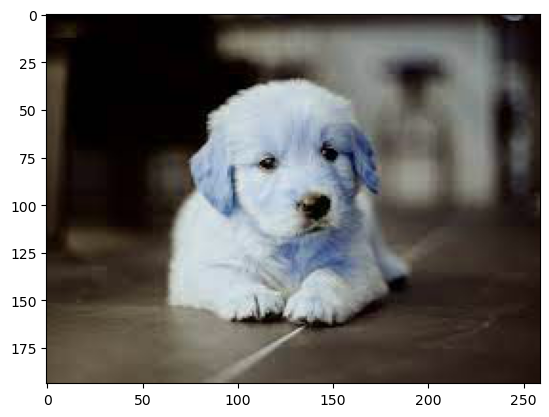

In [32]:
# input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread('dogggg.jpeg')

plt.imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

1/1 [==============================] - 0s 101ms/step
[[ 5.1819944 -3.835741 ]]
0
The image represents a Cat


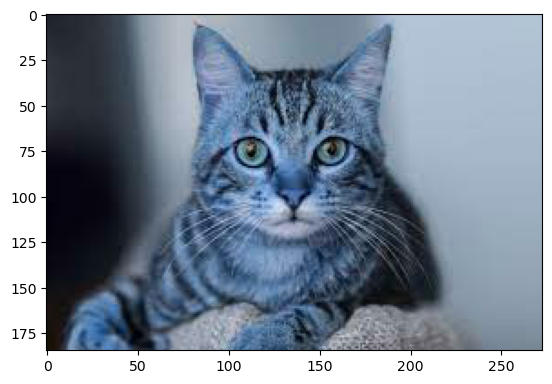

In [33]:
# input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread('cattt.jpeg')

plt.imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')